<a href="https://colab.research.google.com/github/Xeesto/UEP/blob/main/Lab4_Klasyfikacja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_breast_cancer


Zadanie 1

In [2]:
data = load_breast_cancer()
y = data.target #list(data.target_names)
X = data.data #data.feature_names

In [5]:
print(f"Liczba wszystkich przypadków: {X.shape}")

Liczba wszystkich przypadków: (569, 30)


Zadanie 2

In [6]:
mean_cancer = (y == 0).sum()

print(f"Liczba raka złośliwego: {mean_cancer}")

Liczba raka złośliwego: 212


Zadanie 3

In [8]:
import matplotlib.pyplot as plt

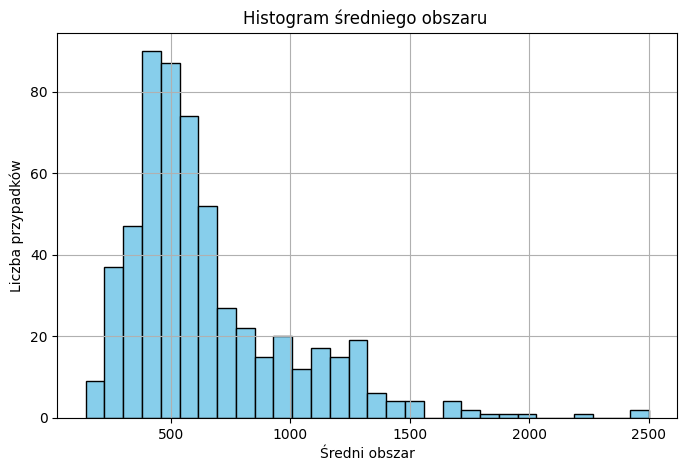

In [10]:
mean_area = X[:, list(data.feature_names).index('mean area')]

plt.figure(figsize=(8, 5))
plt.hist(mean_area, bins=30, color='skyblue', edgecolor='black')
plt.xlabel("Średni obszar")
plt.ylabel("Liczba przypadków")
plt.title("Histogram średniego obszaru ")
plt.grid(True)
plt.show()

Zadanie 4

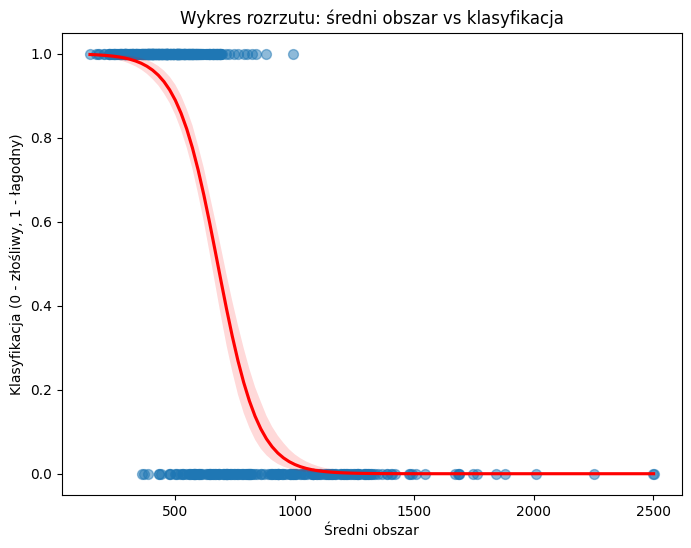

In [14]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.regplot(x=mean_area, y=y, logistic=True, scatter_kws={'s': 50, 'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Wykres rozrzutu: średni obszar vs klasyfikacja')
plt.xlabel('Średni obszar')
plt.ylabel('Klasyfikacja (0 - złośliwy, 1 - łagodny)')
plt.show()


Macierz pomyłek

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [18]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, RocCurveDisplay
import matplotlib.pyplot as plt

In [19]:
#1 Standaryzcja danych
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [20]:
#2 Podział na zbiór uczący i testowy (70% - 30%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [21]:
#3 Budowa modelu regresji logistycznej
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [22]:
#4 Predykcje na zbiorze testowym
y_pred = model.predict(X_test)
y_pred = model.predict(X_test)

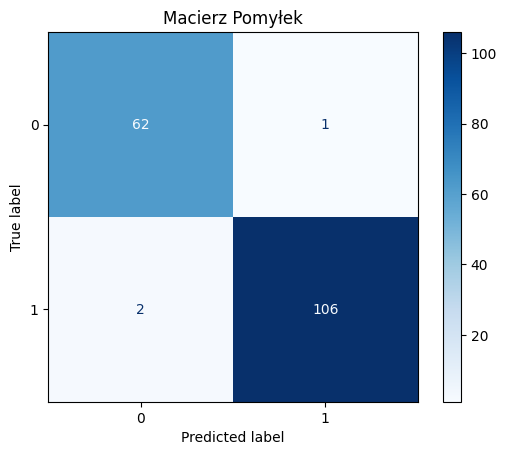

In [24]:
#5 Wizualizacja macierzy pomyłek
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='Blues')
plt.title("Macierz Pomyłek")
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_plot/roc_curve.py:189: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


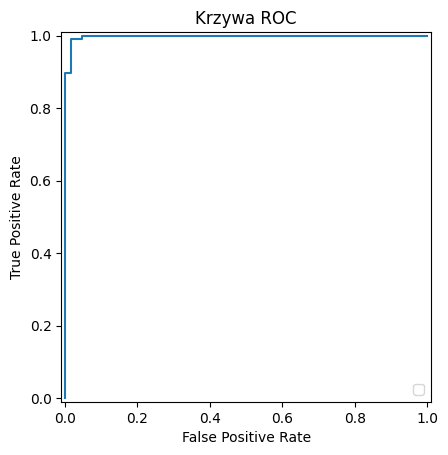

In [25]:
#6 Wizualizacja krzywej ROC
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.title("Krzywa ROC")
plt.show()